In [1]:
import socket, os, platform

print("kernel host  :", socket.gethostname())
print("FQDN         :", socket.getfqdn())
print("SLURM_JOB_ID :", os.getenv("SLURM_JOB_ID"))
print("SLURM_NODELIST:", os.getenv("SLURM_NODELIST"))


kernel host  : login-2
FQDN         : login-2.supercloud.mit.edu
SLURM_JOB_ID : None
SLURM_NODELIST: None


In [ ]:
"""
Plot episode-reward curves for every seed-run that lives one level
below ROOT_DIR.  Each sub-folder name becomes the legend label.
"""
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorboard.backend.event_processing import event_accumulator
import os, glob, numpy as np, matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
from cycler import cycler        
import matplotlib.cm as cm        

ROOT_DIR   = os.path.abspath(
    "/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/scripts/runs/20250618_run1_0x0575"
)



: 

/tmp/ipykernel_3764616/1670186516.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greens  = cm.get_cmap("Blues")


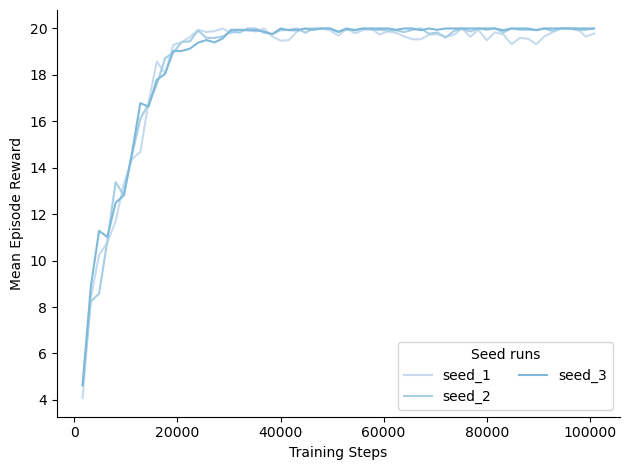

In [3]:


SCALAR_TAG = "rollout/ep_rew_mean"
EMA_WEIGHT = 0

def smooth(a, w):
    if w == 0 or len(a) < 2: return a
    out = np.empty_like(a, dtype=float); out[0] = a[0]
    for i in range(1, len(a)): out[i] = w * out[i-1] + (1 - w) * a[i]
    return out

def first_event_file(run_dir):
    hits = glob.glob(os.path.join(run_dir, "**", "*tfevents*"), recursive=True)
    return hits[0] if hits else None

# 1️Collect seed folders and set the green colour cycle
seed_dirs = [d for d in sorted(os.listdir(ROOT_DIR))
             if os.path.isdir(os.path.join(ROOT_DIR, d))]
greens  = cm.get_cmap("Blues")
palette = greens(np.linspace(0.25, 0.45, len(seed_dirs)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler(color=palette))  # 2️apply palette

#  Plot each run
for child in seed_dirs:
    run_dir = os.path.join(ROOT_DIR, child)

    ev_file = first_event_file(run_dir)
    if ev_file is None:
        print(f"No event file found in {run_dir}")
        continue

    ea = event_accumulator.EventAccumulator(run_dir, size_guidance={"scalars": 0})
    try:
        ea.Reload()
    except Exception as e:
        print(f"Could not load events in {run_dir}: {e}")
        continue

    if SCALAR_TAG not in ea.Tags().get("scalars", []):
        print(f"Tag '{SCALAR_TAG}' absent in {run_dir}")
        continue

    evs     = ea.Scalars(SCALAR_TAG)
    steps   = [e.step  for e in evs]
    rewards = smooth([e.value for e in evs], EMA_WEIGHT)

    ax.plot(steps, rewards, label=child)   # colour chosen automatically

ax.set_xlabel("Training Steps")
ax.set_ylabel("Mean Episode Reward")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
if ax.lines:
    ax.legend(title="Seed runs", ncol=2)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3764616/4154348007.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greens  = cm.get_cmap("Blues")


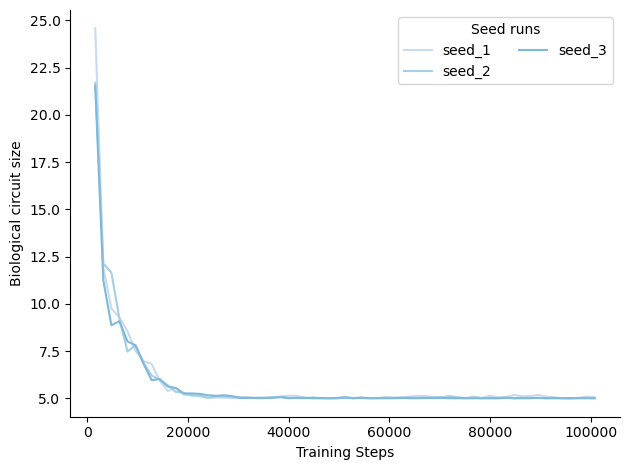

In [4]:


SCALAR_TAG = "rollout/ep_rew_mean"
EMA_WEIGHT = 0

def smooth(a, w):
    if w == 0 or len(a) < 2: return a
    out = np.empty_like(a, dtype=float); out[0] = a[0]
    for i in range(1, len(a)): out[i] = w * out[i-1] + (1 - w) * a[i]
    return out

def first_event_file(run_dir):
    hits = glob.glob(os.path.join(run_dir, "**", "*tfevents*"), recursive=True)
    return hits[0] if hits else None

# 1️Collect seed folders and set the green colour cycle
seed_dirs = [d for d in sorted(os.listdir(ROOT_DIR))
             if os.path.isdir(os.path.join(ROOT_DIR, d))]
greens  = cm.get_cmap("Blues")
palette = greens(np.linspace(0.25, 0.45, len(seed_dirs)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler(color=palette))  # 2️apply palette

#  Plot each run
for child in seed_dirs:
    run_dir = os.path.join(ROOT_DIR, child)

    ev_file = first_event_file(run_dir)
    if ev_file is None:
        print(f"No event file found in {run_dir}")
        continue

    ea = event_accumulator.EventAccumulator(run_dir, size_guidance={"scalars": 0})
    try:
        ea.Reload()
    except Exception as e:
        print(f"Could not load events in {run_dir}: {e}")
        continue

    if SCALAR_TAG not in ea.Tags().get("scalars", []):
        print(f"Tag '{SCALAR_TAG}' absent in {run_dir}")
        continue

    evs     = ea.Scalars(SCALAR_TAG)
    steps   = [e.step  for e in evs]
    rewards = smooth([100*1/e.value for e in evs], EMA_WEIGHT)

    ax.plot(steps, rewards, label=child)   # colour chosen automatically

ax.set_xlabel("Training Steps")
ax.set_ylabel("Biological circuit size")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
if ax.lines:
    ax.legend(title="Seed runs", ncol=2)
plt.tight_layout()
plt.show()